In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
raw_data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', index_col=0,
                       parse_dates=[[0,1]], infer_datetime_format=True, dayfirst=True)
raw_data.dropna(inplace=True)
raw_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [44]:
parsed_data=pd.DataFrame(columns=['year', 'month','day','hour','minute','Global_active_power'])
parsed_data['year'] = raw_data.index.year
parsed_data['month'] = raw_data.index.month
parsed_data['day'] = raw_data.index.day
parsed_data['hour'] = raw_data.index.hour
parsed_data['minute'] = raw_data.index.minute
parsed_data['Global_active_power'] = raw_data['Global_active_power'].to_numpy()
print(parsed_data)

         year  month  day  hour  minute  Global_active_power
0        2006     12   16    17      24                4.216
1        2006     12   16    17      25                5.360
2        2006     12   16    17      26                5.374
3        2006     12   16    17      27                5.388
4        2006     12   16    17      28                3.666
...       ...    ...  ...   ...     ...                  ...
2049275  2010     11   26    20      58                0.946
2049276  2010     11   26    20      59                0.944
2049277  2010     11   26    21       0                0.938
2049278  2010     11   26    21       1                0.934
2049279  2010     11   26    21       2                0.932

[2049280 rows x 6 columns]


In [83]:
from sklearn.model_selection import train_test_split
features = parsed_data.loc[:100000][['year', 'month', 'day', 'hour','minute']]
labels = parsed_data.loc[:100000]['Global_active_power']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print(len(test_labels))

25001


In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_features, train_labels)

RandomForestRegressor()

In [94]:
predictions = rf.predict(test_features.sort_index())
errors = abs(predictions - test_labels.sort_index())
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.17 degrees.


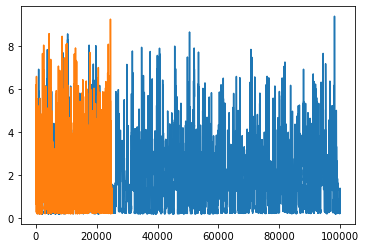

In [99]:
import matplotlib.pyplot as plt
plt.plot(test_labels.sort_index())
plt.plot(predictions)
plt.show()

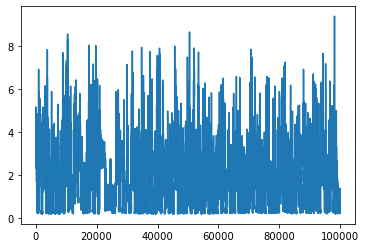

In [97]:
plt.plot(test_labels.sort_index())
plt.show()